# 🎛️ Image Augmentation

## Using OpenCV

In [2]:
# pip install opencv-python

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
img = cv2.imread('./data/helicopter.jpg')


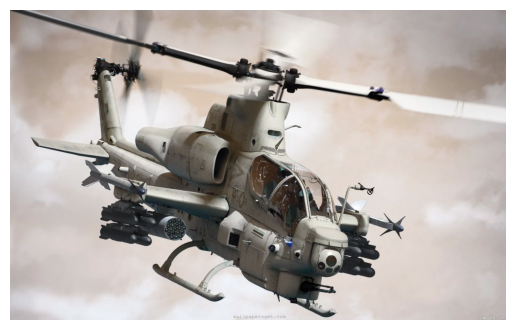

In [15]:
plt.imshow(img)  
plt.axis('off')  
plt.show()

In [16]:
img = cv2.resize(img, (224, 224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [17]:
def rotate(img, angle):
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1.0)
    return cv2.warpAffine(img, M, (w, h))

def flip(img, mode=1): # 1: horizontal, 0: vertical
    return cv2.flip(img, mode)

def zoom(img, zoom_factor=1.2):
    h, w = img.shape[:2]
    new_h, new_w = int(h / zoom_factor), int(w / zoom_factor)
    y1 = (h - new_h) // 2
    x1 = (w - new_w) // 2
    cropped = img[y1:y1+new_h, x1:x1+new_w]
    return cv2.resize(cropped, (w, h))

def brightness(img, factor=1.5):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] * factor, 0, 255)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def translate(img, tx, ty):
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

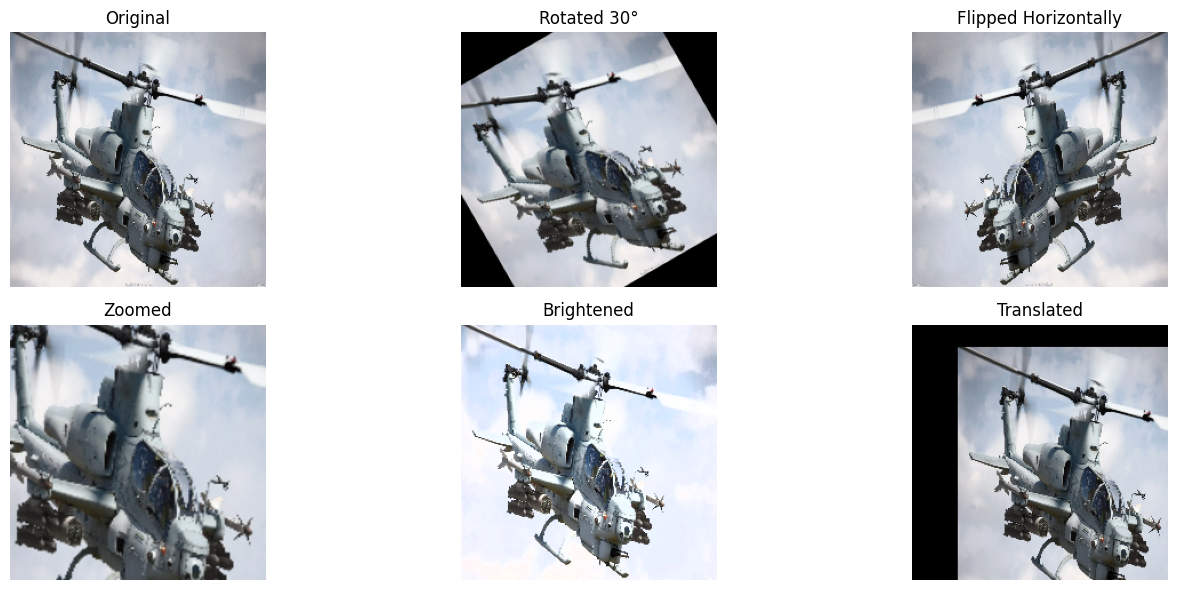

In [18]:
aug_images = {
    "Original": img,
    "Rotated 30°": rotate(img, 30),
    "Flipped Horizontally": flip(img, 1),
    "Zoomed": zoom(img, 1.5),
    "Brightened": brightness(img, 1.5),
    "Translated": translate(img, 40, 20)
}

plt.figure(figsize=(15, 6))
for i, (title, image) in enumerate(aug_images.items()):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()